In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn')
from matplotlib import rc, font_manager
#font_path = "C:/Windows/Fonts/NanumSquareB.TTF"
#font = font_manager.FontProperties(fname=font_path).get_name()
#rc('font', family=font)


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

for i, file in enumerate(os.listdir("../data/rename")):
    globals()[file[:2]] = pd.read_csv("../data/rename/"+file, encoding='cp949')

In [25]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor

In [26]:
df = c3.iloc[:, 10:]
df

,ELCTY_USQNT,CITY_GAS_USQNT,SUM_NRG_USQNT,ELCTY_TOE_USQNT,CITY_GAS_TOE_USQNT,SUM_NRG_TOE_USQNT,ELCTY_GRGS_DSAMT,CITY_GAS_GRGS_DSAMT,SUM_GRGS_DSAMT
0,18492,19731,38223,4.234668,1.693529,5.928197,8.621902,3.537551,12.159453
1,0,9557,9557,0.000000,0.820285,0.820285,0.000000,1.713465,1.713465
2,288074,560172,848246,65.968946,48.080040,114.048986,134.314618,100.432671,234.747289
3,72854,118156,191010,16.683566,10.141430,26.824996,33.968207,21.184070,55.152276
4,334509,462721,797230,76.602561,39.715738,116.318299,155.964955,82.960780,238.925735
...,...,...,...,...,...,...,...,...,...
329360,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
329361,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
329362,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
329363,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestRegressor

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [29]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.116 seconds


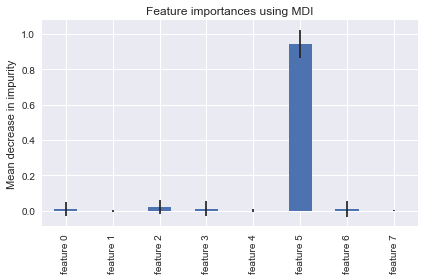

In [30]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [31]:
X

,ELCTY_USQNT,CITY_GAS_USQNT,SUM_NRG_USQNT,ELCTY_TOE_USQNT,CITY_GAS_TOE_USQNT,SUM_NRG_TOE_USQNT,ELCTY_GRGS_DSAMT,CITY_GAS_GRGS_DSAMT
0,18492,19731,38223,4.234668,1.693529,5.928197,8.621902,3.537551
1,0,9557,9557,0.000000,0.820285,0.820285,0.000000,1.713465
2,288074,560172,848246,65.968946,48.080040,114.048986,134.314618,100.432671
3,72854,118156,191010,16.683566,10.141430,26.824996,33.968207,21.184070
4,334509,462721,797230,76.602561,39.715738,116.318299,155.964955,82.960780
...,...,...,...,...,...,...,...,...
329360,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
329361,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
329362,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
329363,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [39]:
for i in range(len(df)):
    num = df.iloc[i].values.sum()
    if num == 0:
        print(i)
        df.drop(i, inplace=True)
    else:
        continue

168
169
170
171
173
174
175
403
471
545
759
914
1405
1406
1478
1568
1624
1744
1797
1806
1814
1839
1927
1939
1953
2049
2099
2165
2344
2392
2397
2409
2445
2458
2515
2531
2616
2707
2722
2869
2963
2981
3097
3150
3152
3226
3267
3289
3406
3415
3457
3482
3529
3592
3622
3940
3953
3977
4034
4112
4146
4179
4255
4266
4368
4376
4395
4563
4749
4785
4944
4951
4978
5030
5087
5136
5198
5321
5409
5419
5426
5554
5568
5589
5609
5751
5893
5897
5937
6149
6274
6307
6422
6621
6681
6769
6799
6849
6938
6940
6968
7169
7199
7217
7454
7594
7609
7726
7932
8053
8125
8258
8347
8350
8437
8444
8534
8602
8623
8656
8737
8741
8817
8840
8861
8865
8870
8940
8964
9171
9194
9210
9215
9274
9322
9342
9439
9754
9844
9857
9942
10018
10061
10199
10221
10270
10409
10483
10640
10711
10743
10745
10763
10766
10792
10831
11291
11305
11348
11354
11493
11520
11563
11570
11634
11705
11716
11718
11823
11830
12204
12393
12426
12430
12546
12713
12724
12742
12814
12936
12946
13096
13097
13157
13184
13198
13236
13535
13595
13949
13959
14330
1

28345
28346
28347
28348
28349
28350
28351
28352
28353
28354
28355
28356
28357
28358
28359
28360
28361
28362
28363
28364
28365
28366
28367
28368
28369
28370
28371
28372
28373
28374
28375
28376
28377
28378
28379
28380
28381
28382
28383
28384
28385
28386
28387
28388
28389
28390
28391
28392
28393
28394
28395
28396
28397
28398
28399
28400
28401
28402
28403
28404
28405
28406
28407
28408
28409
28410
28411
28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
28426
28427
28428
28429
28430
28431
28432
28433
28434
28435
28436
28437
28438
28439
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464
28465
28639
28641
28690
28712
28871
28877
28937
28942
29011
29014
29098
29223
29378
29425
29426
29468
29858
29865
29866
29938
29996
30004
30009
30054
30081
30083
30110
30143
30198
30211
30213
30249
30258
30261
30267
30283
30299
30317
30367
30403
30404
30426
30483
30496
30570
3061

56385
56386
56387
56388
56389
56390
56391
56392
56393
56394
56395
56396
56397
56398
56399
56400
56401
56402
56403
56404
56405
56406
56407
56408
56409
56410
56411
56412
56413
56414
56415
56416
56417
56418
56419
56420
56421
56422
56423
56424
56425
56426
56427
56428
56429
56430
56431
56432
56433
56434
56435
56436
56437
56438
56439
56440
56441
56442
56443
56444
56445
56446
56447
56448
56449
56450
56451
56452
56453
56454
56455
56456
56457
56458
56459
56460
56461
56462
56463
56464
56465
56466
56467
56468
56469
56470
56471
56472
56473
56474
56475
56476
56477
56478
56479
56480
56481
56482
56483
56484
56485
56486
56487
56488
56489
56490
56491
56492
56493
56494
56495
56496
56497
56498
56499
56500
56501
56502
56503
56504
56505
56506
56507
56508
56509
56510
56511
56512
56513
56514
56515
56516
56517
56518
56519
56520
56521
56522
56523
56524
56525
56526
56527
56528
56529
56530
56531
56532
56533
56534
56535
56536
56537
56538
56539
56540
56541
56542
56543
56544
56545
56546
56547
56548
56549
56550
5655

84118
84125
84239
84240
84241
84242
84243
84244
84245
84246
84247
84248
84249
84250
84251
84252
84253
84254
84255
84256
84257
84258
84259
84260
84261
84262
84263
84264
84265
84266
84267
84268
84269
84270
84271
84272
84273
84274
84275
84276
84277
84278
84279
84280
84281
84282
84283
84284
84285
84286
84287
84288
84289
84290
84291
84292
84293
84294
84295
84296
84297
84298
84299
84300
84301
84302
84303
84304
84305
84306
84307
84308
84309
84310
84311
84312
84313
84314
84315
84316
84317
84318
84319
84320
84321
84322
84323
84324
84325
84326
84327
84328
84329
84330
84331
84332
84333
84334
84335
84336
84337
84338
84339
84340
84341
84342
84343
84344
84345
84346
84347
84348
84349
84350
84351
84352
84353
84354
84355
84356
84357
84358
84359
84360
84361
84362
84363
84364
84365
84366
84367
84368
84369
84370
84371
84372
84373
84374
84375
84376
84377
84378
84379
84380
84381
84382
84383
84384
84385
84386
84387
84388
84389
84390
84391
84392
84393
84394
84395
84396
84397
84398
84399
84400
84401
84402
8440

97831
97838
97845
97889
97959
98015
98142
98150
98153
98189
98208
98353
98362
98526
98559
98569
98580
98591
98601
98642
98776
98779
98791
98830
98843
98905
98910
98929
98969
98979
99019
99055
99144
99162
99216
99230
99266
99308
99333
99654
99706
99727
99738
99821
99823
99836
99845
99921
99938
100076
100089
100107
100132
100147
100151
100153
100154
100158
100227
100251
100315
100337
100490
100503
100554
100555
100565
100570
100579
100585
100602
100617
100622
100649
100680
100691
100707
100718
100749
100814
100816
100825
100832
100891
100932
100947
100988
101003
101018
101052
101167
101177
101265
101270
101283
101288
101293
101340
101342
101382
101387
101388
101418
101420
101424
101501
101508
101523
101531
101566
101571
101579
101580
101581
101591
101636
101647
101697
101708
101733
101759
101774
101800
101836
101860
101863
101893
101930
102076
102082
102085
102101
102109
102125
102126
102156
102163
102186
102202
102207
102214
102256
102263
102276
102286
102296
102302
102314
102370
102445

112796
112797
112798
112799
112800
112801
112802
112803
112804
112805
112806
112807
112808
112809
112810
112811
112812
112813
112814
112815
112816
112817
112818
112819
112820
112821
112822
112823
112824
112825
112826
112827
112828
112829
112830
112831
112832
112833
112834
112835
112836
112837
112838
112839
112840
112841
112842
112843
112844
112845
112846
112847
112848
112849
112850
112851
112852
112853
112854
112855
112856
112857
112858
112859
112860
112861
112862
112863
112864
112865
112866
112867
112868
112869
112870
112871
112872
112873
112874
112875
112876
112877
112878
112879
112880
112881
112882
112883
112884
112885
112886
112887
112888
112889
112890
112891
112892
112893
112894
112895
112896
112897
112898
112899
112900
112901
112902
112903
112904
112905
112906
112907
112908
112909
112910
112911
112912
112913
112914
112915
112916
112917
112918
112919
112920
112921
112922
112923
112924
112925
112926
112927
112928
112929
112930
112931
112932
112933
112934
112935
112936
112937
112938

133308
133332
133418
133446
133480
133583
133589
133597
133612
133692
133797
133881
133889
133962
133963
133995
134035
134166
134173
134255
134418
134471
134493
134562
134569
134582
134585
134768
134816
134836
134905
134985
134988
135013
135016
135050
135053
135126
135134
135171
135182
135285
135470
135541
135544
135587
135633
135686
135693
135800
135969
135989
136019
136094
136248
136299
136362
136366
136373
136598
136733
136825
136831
136860
136897
136972
137015
137067
137132
137163
137248
137302
137393
137420
137541
137574
137640
137668
137712
137719
137765
137785
137804
137810
137831
137875
137876
137894
137926
138020
138028
138056
138107
138118
138127
138172
138176
138209
138213
138242
138313
138357
138364
138373
138382
138410
138430
138451
138480
138483
138561
138596
138618
138653
138729
138756
138758
138768
138776
138786
138792
138794
138798
138855
138894
138907
138942
138972
139003
139011
139012
139152
139199
139303
139426
139434
139467
139475
139525
139557
139560
139618
139619

156219
156220
156221
156222
156223
156224
156225
156226
156227
156228
156229
156230
156231
156232
156233
156234
156235
156236
156237
156238
156239
156240
156241
156242
156243
156244
156245
156246
156247
156248
156249
156250
156251
156252
156253
156254
156255
156256
156257
156258
156259
156260
156261
156262
156263
156264
156265
156266
156267
156268
156269
156270
156271
156272
156273
156274
156275
156276
156277
156278
156279
156280
156281
156282
156283
156284
156285
156286
156287
156288
156289
156290
156291
156292
156293
156294
156295
156296
156297
156298
156299
156300
156301
156302
156303
156304
156305
156306
156307
156308
156309
156310
156311
156312
156313
156314
156315
156316
156317
156318
156319
156320
156321
156322
156323
156324
156325
156326
156327
156328
156329
156330
156331
156332
156333
156334
156335
156336
156337
156338
156339
156340
156341
156342
156343
156344
156345
156346
156347
156348
156349
156350
156351
156352
156353
156354
156355
156356
156357
156358
156359
156360
156361

168512
168560
168582
168603
168624
168632
168633
168640
168649
168652
168653
168673
168674
168685
168693
168734
168743
168744
168745
168768
168858
168916
168997
169038
169053
169055
169076
169106
169121
169160
169173
169208
169238
169278
169309
169343
169365
169417
169453
169463
169567
169587
169656
169687
169690
169729
169737
169795
169805
169822
169880
169881
169910
169921
169927
169951
169958
169971
169975
169996
170007
170052
170108
170110
170131
170147
170166
170184
170188
170203
170235
170283
170285
170300
170301
170303
170326
170327
170333
170345
170466
170567
170596
170612
170629
170660
170662
170683
170755
170804
170830
170879
170897
170912
170922
170924
170926
170985
170993
171017
171041
171068
171071
171072
171074
171090
171096
171101
171105
171107
171111
171133
171165
171177
171182
171185
171189
171198
171230
171240
171244
171252
171277
171288
171344
171414
171430
171432
171433
171481
171490
171681
171683
171695
171710
171731
171732
171733
171734
171751
171756
171761
171849

186259
186260
186261
186262
186263
186264
186265
186266
186267
186268
186269
186270
186271
186272
186273
186274
186275
186276
186277
186278
186279
186280
186281
186282
186283
186284
186285
186286
186287
186288
186289
186290
186291
186292
186293
186294
186295
186296
186297
186298
186299
186300
186301
186302
186303
186304
186305
186306
186307
186308
186309
186310
186311
186312
186313
186314
186315
186316
186317
186318
186319
186320
186321
186322
186323
186324
186325
186326
186327
186328
186329
186330
186331
186332
186333
186334
186335
186336
186337
186338
186339
186340
186341
186342
186343
186344
186345
186346
186347
186348
186349
186350
186351
186352
186353
186354
186355
186356
186357
186358
186359
186360
186361
186362
186363
186364
186365
186366
186367
186368
186369
186370
186371
186372
186373
186374
186375
186376
186377
186378
186379
186380
186381
186382
186383
186384
186385
186386
186387
186388
186389
186390
186391
186392
186393
186394
186395
186396
186397
186398
186399
186400
186401

196192
196235
196343
196359
196366
196378
196403
196404
196406
196409
196415
196466
196478
196520
196593
196630
196681
196727
196982
196999
197008
197018
197023
197069
197085
197184
197203
197209
197238
197241
197274
197330
197334
197340
197346
197381
197388
197438
197439
197493
197503
197504
197533
197583
197617
197763
197790
197870
197910
197943
197950
197953
197985
198061
198079
198086
198102
198131
198151
198177
198198
198229
198233
198239
198246
198247
198250
198255
198256
198288
198332
198381
198389
198417
198440
198444
198455
198460
198464
198475
198484
198529
198533
198566
198591
198599
198647
198669
198690
198711
198712
198720
198727
198736
198739
198740
198760
198761
198764
198771
198779
198800
198829
198830
198831
198850
198908
198941
198942
198962
198999
199015
199074
199078
199101
199102
199106
199115
199131
199136
199138
199153
199183
199198
199237
199250
199285
199315
199346
199355
199385
199419
199441
199493
199529
199539
199573
199641
199662
199672
199730
199762
199764

215876
215880
215881
215882
215884
215885
215886
215889
215899
215901
215903
215904
215905
215906
215907
215908
215909
215910
215911
215916
215919
216425
216426
216427
216428
216429
216430
216431
216432
216433
216434
216435
216436
216437
216438
216439
216440
216441
216442
216443
216444
216445
216446
216447
216448
216449
216450
216451
216452
216453
216454
216455
216456
216457
216458
216459
216460
216461
216462
216463
216464
216465
216466
216467
216468
216469
216470
216471
216472
216473
216474
216475
216476
216477
216478
216479
216480
216481
216482
216483
216484
216485
216486
216487
216488
216489
216490
216491
216492
216493
216494
216495
216496
216497
216498
216499
216500
216501
216502
216503
216504
216505
216506
216507
216508
216509
216510
216511
216512
216513
216514
216515
216516
216517
216518
216519
216520
216521
216522
216523
216524
216525
216526
216527
216528
216529
216530
216531
216532
216533
216534
216535
216536
216537
216538
216539
216540
216541
216542
216543
216544
216545
216546

224414
224422
224445
224448
224485
224494
224499
224516
224520
224523
224564
224619
224657
224700
224782
224875
224890
224913
224929
224995
225015
225016
225085
225109
225123
225145
225146
225209
225213
225233
225287
225292
225334
225354
225416
225421
225466
225494
225504
225526
225528
225551
225558
225564
225567
225574
225633
225638
225646
225695
225699
225704
225796
225805
225869
225916
225958
225965
225975
225988
226046
226093
226095
226109
226112
226136
226145
226155
226166
226225
226268
226273
226286
226291
226293
226296
226334
226338
226353
226431
226444
226460
226467
226500
226506
226508
226511
226582
226592
226617
226696
226733
226736
226760
226782
226786
226895
227082
227099
227119
227124
227170
227186
227285
227304
227310
227339
227367
227375
227450
227478
227484
227491
227541
227542
227607
227608
227612
227636
227725
227783
227798
227817
227864
227891
227951
227970
228000
228009
228042
228045
228052
228055
228060
228102
228103
228176
228183
228199
228207
228227
228242
228273

245286
245287
245294
245297
245298
245301
245304
245305
245306
245309
245310
245311
245312
245313
245315
245316
245317
245320
245322
245324
245325
245338
245339
245340
245346
245347
245349
245352
245354
245355
245356
245361
245367
245368
245369
245375
245376
245377
245379
245385
245389
245394
245398
245405
245410
245430
245431
245432
245453
245458
245460
245461
245466
245473
245475
245479
245483
245485
245494
245498
245505
245510
245512
245516
245517
245527
245534
245545
245547
245555
245556
245560
245566
245568
245569
245570
245572
245573
245574
245578
245579
245592
245593
245594
245600
245601
245603
245618
245625
245631
245632
245635
245639
245640
245642
245644
245646
245649
245650
245654
245658
245662
245667
245672
245674
245675
245676
245682
245689
245696
245699
245702
245707
245719
245726
245731
245736
245737
245738
245741
245745
245748
245756
245761
245763
245767
245770
245771
245773
245777
245780
245788
245794
245795
245796
245798
245799
245800
245802
245803
245804
245805
245806

258937
258955
258956
258960
258975
258992
258996
259002
259015
259061
259068
259093
259101
259102
259112
259134
259151
259160
259163
259164
259169
259183
259185
259202
259203
259224
259243
259252
259255
259274
259318
259367
259389
259424
259440
259499
259503
259510
259525
259537
259545
259556
259580
259598
259609
259624
259663
259676
259711
259773
259782
259812
259822
259845
259867
259877
259951
259954
259958
259963
260066
260087
260097
260107
260154
260174
260184
260187
260202
260222
260224
260232
260282
260289
260300
260302
260311
260314
260374
260384
260388
260392
260412
260422
260462
260502
260547
260562
260620
260643
260656
260661
260665
260695
260702
260705
260708
260715
260727
260802
260819
260821
260842
260848
260899
260956
260960
260994
260995
261038
261043
261057
261086
261100
261101
261107
261110
261148
261168
261170
261180
261242
261318
261358
261366
261377
261399
261412
261414
261451
261472
261483
261500
261517
261527
261559
261574
261578
261590
261620
261624
261635
261655

275869
275874
275881
275887
275889
275891
275895
275896
275898
275900
275902
275905
275906
275910
275911
275913
275915
275916
275921
275926
275928
275929
275930
275936
275943
275947
275949
275952
275955
275960
275963
275966
275970
275974
275976
275978
275980
275982
275984
275987
275995
275998
276000
276001
276002
276003
276008
276010
276014
276016
276017
276018
276019
276022
276026
276032
276033
276034
276037
276039
276042
276044
276045
276047
276050
276053
276054
276056
276058
276059
276060
276062
276065
276068
276069
276071
276073
276074
276075
276076
276077
276081
276083
276086
276088
276089
276091
276093
276095
276096
276097
276098
276100
276102
276103
276105
276106
276107
276109
276111
276117
276121
276123
276124
276126
276132
276135
276139
276141
276145
276149
276152
276153
276155
276157
276158
276160
276162
276163
276166
276169
276172
276179
276195
276197
276201
276202
276211
276224
276228
276231
276241
276271
276280
276281
276282
276285
276301
276304
276306
276320
276326
276334

285515
285516
285526
285537
285544
285571
285575
285579
285599
285606
285612
285651
285656
285659
285697
285754
285779
285784
285858
285868
285890
285892
285915
285932
285940
285975
285998
286003
286007
286010
286019
286033
286057
286058
286060
286065
286094
286156
286159
286164
286228
286271
286274
286316
286323
286333
286339
286345
286361
286364
286380
286385
286392
286393
286445
286447
286461
286464
286466
286475
286496
286504
286505
286507
286542
286548
286563
286572
286590
286614
286619
286632
286637
286643
286651
286657
286665
286678
286682
286683
286684
286714
286773
286786
286798
286801
286808
286814
286823
286827
286838
286839
286843
286845
286848
286866
286918
286924
286927
286951
286963
286966
286982
286997
287027
287068
287089
287091
287113
287117
287143
287152
287153
287160
287171
287207
287220
287222
287260
287295
287367
287370
287402
287414
287417
287438
287443
287456
287488
287504
287530
287559
287560
287570
287599
287610
287617
287623
287638
287650
287654
287678
287685

301176
301180
301183
301188
301198
301229
301261
301266
301272
301279
301291
301309
301338
301360
301362
301379
301387
301425
301446
301468
301476
301482
301511
301514
301529
301534
301559
301586
301592
301595
301596
301614
301667
301727
301758
301760
301771
301775
301778
301784
301821
301823
301863
301964
301969
301970
301973
302009
302039
302055
302068
302076
302086
302113
302114
302131
302133
302136
302156
302158
302174
302194
302200
302215
302223
302229
302230
302231
302232
302256
302271
302281
302284
302306
302327
302356
302358
302373
302378
302379
302388
302395
302397
302399
302414
302423
302431
302432
302435
302453
302463
302479
302497
302550
302561
302574
302575
302582
302599
302602
302604
302608
302629
302634
302637
302654
302681
302688
302689
302693
302696
302706
302714
302724
302730
302732
302752
302756
302759
302764
302768
302771
302783
302787
302819
302822
302827
302849
302887
302889
302890
302908
302914
302944
302946
302953
302954
302956
302974
302979
302991
303004
303014

IndexError: single positional indexer is out-of-bounds

In [40]:
df

,ELCTY_USQNT,CITY_GAS_USQNT,SUM_NRG_USQNT,ELCTY_TOE_USQNT,CITY_GAS_TOE_USQNT,SUM_NRG_TOE_USQNT,ELCTY_GRGS_DSAMT,CITY_GAS_GRGS_DSAMT,SUM_GRGS_DSAMT
0,18492,19731,38223,4.234668,1.693529,5.928197,8.621902,3.537551,12.159453
1,0,9557,9557,0.000000,0.820285,0.820285,0.000000,1.713465,1.713465
2,288074,560172,848246,65.968946,48.080040,114.048986,134.314618,100.432671,234.747289
3,72854,118156,191010,16.683566,10.141430,26.824996,33.968207,21.184070,55.152276
4,334509,462721,797230,76.602561,39.715738,116.318299,155.964955,82.960780,238.925735
...,...,...,...,...,...,...,...,...,...
329360,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
329361,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
329362,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
329363,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
from sklearn.ensemble import RandomForestRegressor

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [43]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.095 seconds


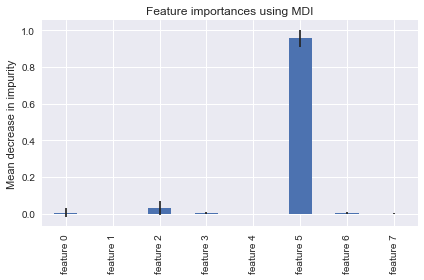

In [44]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Feature importance based on feature permutation

In [50]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [51]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 57.034 seconds


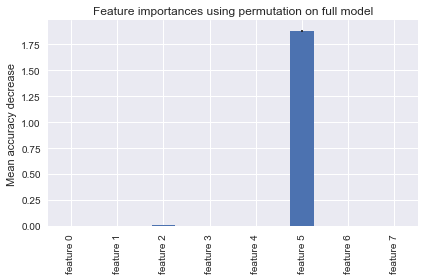

In [52]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()